# Feature Engineering

In [192]:
import pathlib
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Importando os dados do notebook limpo

In [193]:
DATA_DIR = pathlib.Path.cwd().parent / 'data'
print(DATA_DIR)

/Users/luccahiratsuca/Github/Insper/4 Semestre/Machine Learning/ames-project/data


In [194]:
clean_data_path = DATA_DIR / 'processed' / 'ames_clean.pkl'

In [195]:
df = pd.read_pickle(clean_data_path)
df.head()

,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Lot.Shape,Land.Contour,Lot.Config,Land.Slope,Neighborhood,Bldg.Type,...,Sale.Type,Sale.Condition,SalePrice,Condition,HasShed,HasAlley,Exterior,Garage.Age,Remod.Age,House.Age
0,20,RL,141.0,31770.0,IR1,Lvl,Corner,Gtl,NAmes,1Fam,...,GroupedWD,Normal,5.332438,Norm,False,False,BrkFace,50.0,50.0,50.0
1,20,RH,80.0,11622.0,Reg,Lvl,Inside,Gtl,NAmes,1Fam,...,GroupedWD,Normal,5.021189,Roads,False,False,VinylSd,49.0,49.0,49.0
2,20,RL,81.0,14267.0,IR1,Lvl,Corner,Gtl,NAmes,1Fam,...,GroupedWD,Normal,5.235528,Norm,False,False,Wd Sdng,52.0,52.0,52.0
3,20,RL,93.0,11160.0,Reg,Lvl,Corner,Gtl,NAmes,1Fam,...,GroupedWD,Normal,5.387390,Norm,False,False,BrkFace,42.0,42.0,42.0
4,60,RL,74.0,13830.0,IR1,Lvl,Inside,Gtl,Gilbert,1Fam,...,GroupedWD,Normal,5.278525,Norm,False,False,VinylSd,13.0,12.0,13.0


## Correlação

In [196]:
corr = df.corr(numeric_only=True)
corr

,Lot.Frontage,Lot.Area,Mas.Vnr.Area,BsmtFin.SF.1,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,...,Pool.Area,Misc.Val,Mo.Sold,Yr.Sold,SalePrice,HasShed,HasAlley,Garage.Age,Remod.Age,House.Age
Lot.Frontage,1.000000,0.355328,0.200392,0.205371,0.042011,0.106536,0.336705,0.418892,0.029599,-0.001825,...,0.162721,0.034313,0.014470,-0.004747,0.344784,0.011320,-0.177767,-0.071120,-0.089459,-0.121554
Lot.Area,0.355328,1.000000,0.126555,0.200801,0.086703,0.023159,0.265581,0.325148,0.034176,0.001377,...,0.095011,0.069648,0.010495,-0.021921,0.267173,0.090580,-0.093665,0.001711,-0.026623,-0.030109
Mas.Vnr.Area,0.200392,0.126555,1.000000,0.299089,-0.016372,0.085895,0.390820,0.394105,0.119587,-0.057367,...,0.004278,0.044741,-0.001136,-0.016058,0.446062,-0.043707,-0.082080,-0.243484,-0.188297,-0.304256
BsmtFin.SF.1,0.205371,0.200801,0.299089,1.000000,-0.056870,-0.482020,0.533889,0.462239,-0.165270,-0.064834,...,0.084401,0.093445,-0.002841,0.026386,0.407297,-0.001750,-0.150033,-0.185608,-0.141578,-0.272546
BsmtFin.SF.2,0.042011,0.086703,-0.016372,-0.056870,1.000000,-0.239814,0.087399,0.084590,-0.100135,-0.004195,...,0.044452,-0.005305,-0.009417,0.009672,0.012289,0.013147,-0.043275,0.073384,0.066803,0.033595
Bsmt.Unf.SF,0.106536,0.023159,0.085895,-0.482020,-0.239814,1.000000,0.409612,0.301193,-0.000609,0.043669,...,-0.032724,-0.011220,0.026151,-0.040859,0.195797,-0.063055,0.042891,-0.168757,-0.167881,-0.132291
Total.Bsmt.SF,0.336705,0.265581,0.390820,0.533889,0.087399,0.409612,1.000000,0.815610,-0.211210,-0.025204,...,0.072119,0.083837,0.019646,-0.009829,0.624716,-0.060011,-0.129695,-0.333923,-0.289815,-0.403118
X1st.Flr.SF,0.418892,0.325148,0.394105,0.462239,0.084590,0.301193,0.815610,1.000000,-0.252629,-0.012653,...,0.123227,0.093944,0.043615,-0.010413,0.605974,-0.026975,-0.141416,-0.255724,-0.236839,-0.309767
X2nd.Flr.SF,0.029599,0.034176,0.119587,-0.165270,-0.100135,-0.000609,-0.211210,-0.252629,1.000000,0.021209,...,0.044640,-0.005129,0.014998,-0.018818,0.280400,-0.014918,0.106856,-0.090822,-0.158492,-0.018481
Low.Qual.Fin.SF,-0.001825,0.001377,-0.057367,-0.064834,-0.004195,0.043669,-0.025204,-0.012653,0.021209,1.000000,...,0.036080,-0.005848,0.006629,-0.005593,-0.042973,0.003850,0.067761,0.047639,0.062855,0.143611


<Axes: >

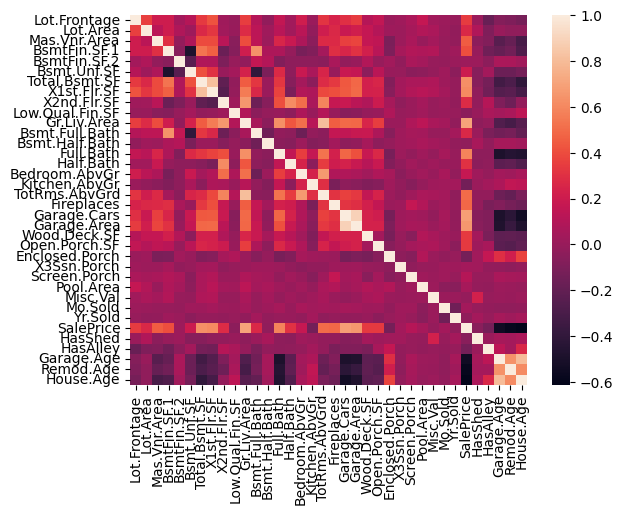

In [197]:
corr = df.corr(numeric_only=True)

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

Analisando as colunas com maiores correlações com a variável alvo

In [198]:
maiores_corr = corr.index[abs(corr["SalePrice"])>0.4]

maiores_corr = maiores_corr[~maiores_corr.str.endswith('Age')]
maiores_corr

Index(['Mas.Vnr.Area', 'BsmtFin.SF.1', 'Total.Bsmt.SF', 'X1st.Flr.SF',
       'Gr.Liv.Area', 'Full.Bath', 'TotRms.AbvGrd', 'Fireplaces',
       'Garage.Cars', 'Garage.Area', 'SalePrice'],
      dtype='object')

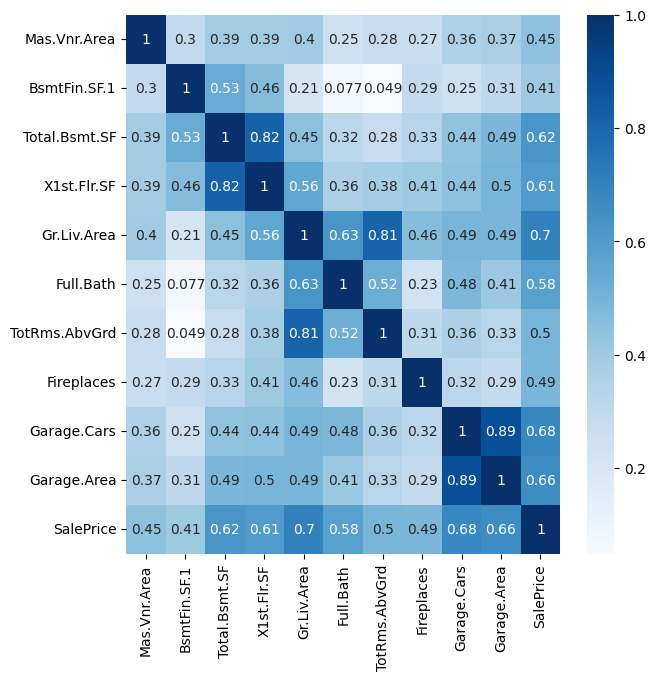

In [199]:
plt.figure(figsize=(7,7))
ax = sns.heatmap(df[maiores_corr].corr(),annot=True,cmap="Blues")

In [200]:
corr.SalePrice.sort_values(ascending=False)

SalePrice          1.000000
Gr.Liv.Area        0.702893
Garage.Cars        0.682475
Garage.Area        0.659309
Total.Bsmt.SF      0.624716
X1st.Flr.SF        0.605974
Full.Bath          0.579069
TotRms.AbvGrd      0.496723
Fireplaces         0.489465
Mas.Vnr.Area       0.446062
BsmtFin.SF.1       0.407297
Lot.Frontage       0.344784
Open.Porch.SF      0.334686
Wood.Deck.SF       0.332611
Half.Bath          0.306286
X2nd.Flr.SF        0.280400
Bsmt.Full.Bath     0.268261
Lot.Area           0.267173
Bsmt.Unf.SF        0.195797
Bedroom.AbvGr      0.174658
Screen.Porch       0.108333
Pool.Area          0.054859
Mo.Sold            0.042859
X3Ssn.Porch        0.040288
BsmtFin.SF.2       0.012289
Misc.Val          -0.010276
Bsmt.Half.Bath    -0.026389
Yr.Sold           -0.028056
Low.Qual.Fin.SF   -0.042973
HasShed           -0.054273
HasAlley          -0.130591
Enclosed.Porch    -0.131509
Kitchen.AbvGr     -0.134768
Garage.Age        -0.548235
Remod.Age         -0.582060
House.Age         -0

In [201]:
df.columns

Index(['MS.SubClass', 'MS.Zoning', 'Lot.Frontage', 'Lot.Area', 'Lot.Shape',
       'Land.Contour', 'Lot.Config', 'Land.Slope', 'Neighborhood', 'Bldg.Type',
       'House.Style', 'Overall.Qual', 'Overall.Cond', 'Roof.Style',
       'Mas.Vnr.Type', 'Mas.Vnr.Area', 'Exter.Qual', 'Exter.Cond',
       'Foundation', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure',
       'BsmtFin.Type.1', 'BsmtFin.SF.1', 'BsmtFin.Type.2', 'BsmtFin.SF.2',
       'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Heating.QC', 'Central.Air',
       'Electrical', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF',
       'Gr.Liv.Area', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Full.Bath',
       'Half.Bath', 'Bedroom.AbvGr', 'Kitchen.AbvGr', 'Kitchen.Qual',
       'TotRms.AbvGrd', 'Functional', 'Fireplaces', 'Garage.Type',
       'Garage.Finish', 'Garage.Cars', 'Garage.Area', 'Paved.Drive',
       'Wood.Deck.SF', 'Open.Porch.SF', 'Enclosed.Porch', 'X3Ssn.Porch',
       'Screen.Porch', 'Pool.Area', 'Fence', 'Misc.Val', 'Mo.Sold', 'Yr.Sold',
   

In [202]:
df = df.drop([
    'Wood.Deck.SF', 'Open.Porch.SF', 'Mas.Vnr.Area',
    'BsmtFin.SF.1', 'Bsmt.Unf.SF', 'Total.Bsmt.SF',
    'X1st.Flr.SF', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF',
    'MS.Zoning', 'Garage.Cars', 'Garage.Area',
    'Full.Bath', 'House.Age', 'TotRms.AbvGrd'

], axis=1)

In [203]:
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns

df = pd.get_dummies(df, columns=non_numeric_columns)

for col in df.columns:
    df[col].fillna(df[col].median(), inplace=True)

In [204]:
from sklearn.model_selection import train_test_split

In [205]:
RANDOM_SEED = 42 

In [206]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice'].astype(float)

In [207]:
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=RANDOM_SEED,
)

In [208]:
from sklearn.linear_model import LinearRegression

In [210]:
model = LinearRegression()
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [211]:
from sklearn.metrics import mean_squared_error

RMSE = np.sqrt(mean_squared_error(ytest, ypred))

In [212]:
RMSE

0.0589902720930403

In [213]:
error_percent = 100 * (10**RMSE - 1)
print(f'Average error is {error_percent:.2f}%')

Average error is 14.55%
